In [1]:
import pandas as pd

In [2]:
#!pip install scikit-learn==1.6.1

In [53]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 5.6 MB/s eta 0:00:00 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 5.0 MB/s eta 0:00:00 0:00:010:00:01


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np

In [6]:
df = pd.read_csv('car_prices.csv')


In [7]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
df.shape

(558837, 16)

In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [11]:
#Check for missing values
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [12]:
#Drop rows of critical columns with null values
df.dropna(subset=['vin','sellingprice', 'odometer', 'condition', 'mmr', 'saledate'], inplace=True)

In [13]:
#Impute rows of non-critical columns with null values
df['make'] = df['make'].fillna('unknown')
df['model'] = df['model'].fillna('unknown')
df['trim'] = df['trim'].fillna('unknown')
df['body'] = df['body'].fillna('unknown')
df['transmission'] = df['transmission'].fillna('unknown')
df['color'] = df['color'].fillna('unknown')
df['interior'] = df['interior'].fillna('unknown')


In [14]:
#Drop Duplicates
df.drop_duplicates(inplace = True)

In [15]:
#Categorical cleanup
df['make'] = df['make'].str.strip().str.lower()
df['model'] = df['model'].str.strip().str.lower()
df['trim'] = df['trim'].str.strip().str.lower()
df['body'] = df['body'].str.strip().str.lower()


In [16]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [17]:
print(df['vin'].duplicated().sum())


8216


In [18]:
#Check if duplicates represent different transactions
duplicates = df[df.duplicated(subset='vin', keep=False)]
duplicates.sort_values('vin').head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
49021,2000,acura,tl,3.2,sedan,automatic,19uua5663ya022038,fl,19.0,105420.0,gold,beige,autonation toyota scion weston,2150.0,1100.0,Tue Dec 23 2014 12:15:00 GMT-0800 (PST)
218119,2000,acura,tl,3.2,sedan,automatic,19uua5663ya022038,fl,19.0,105431.0,gold,tan,autonation toyota scion weston,2325.0,1000.0,Tue Jan 27 2015 10:00:00 GMT-0800 (PST)
344335,2006,acura,tl,base,sedan,manual,19uua65596a059705,nj,25.0,89741.0,white,black,meridian remarketing,9100.0,8500.0,Wed Mar 04 2015 01:30:00 GMT-0800 (PST)
160618,2006,acura,tl,base,sedan,manual,19uua65596a059705,nj,26.0,89661.0,white,brown,santander consumer,9025.0,8200.0,Wed Jan 28 2015 01:30:00 GMT-0800 (PST)
186392,2005,acura,tl,3.2,sedan,automatic,19uua66215a070166,ca,37.0,131727.0,silver,gray,premium auto wholesale,6600.0,6900.0,Thu Jan 22 2015 04:00:00 GMT-0800 (PST)
136582,2005,acura,tl,3.2,sedan,automatic,19uua66215a070166,ca,37.0,131725.0,silver,gray,premium auto wholesale,6400.0,7800.0,Thu Jan 15 2015 04:00:00 GMT-0800 (PST)
145090,2008,acura,tl,base,sedan,automatic,19uua66228a015410,az,35.0,91649.0,gray,black,earnhardt,10750.0,11000.0,Thu Jan 15 2015 03:00:00 GMT-0800 (PST)
359942,2008,acura,tl,base,sedan,automatic,19uua66228a015410,az,23.0,92029.0,gray,black,remarketing by ge/manheim phoenix,10200.0,9700.0,Thu Feb 26 2015 03:00:00 GMT-0800 (PST)
386571,2008,acura,tl,base,sedan,unknown,19uua66228a024043,nc,48.0,78807.0,white,beige,medlin buick gmc mazda,10950.0,13100.0,Tue Mar 03 2015 01:15:00 GMT-0800 (PST)
350072,2008,acura,tl,base,sedan,unknown,19uua66228a024043,nc,37.0,78758.0,white,tan,hendrick lexus,10750.0,12600.0,Wed Feb 25 2015 06:00:00 GMT-0800 (PST)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


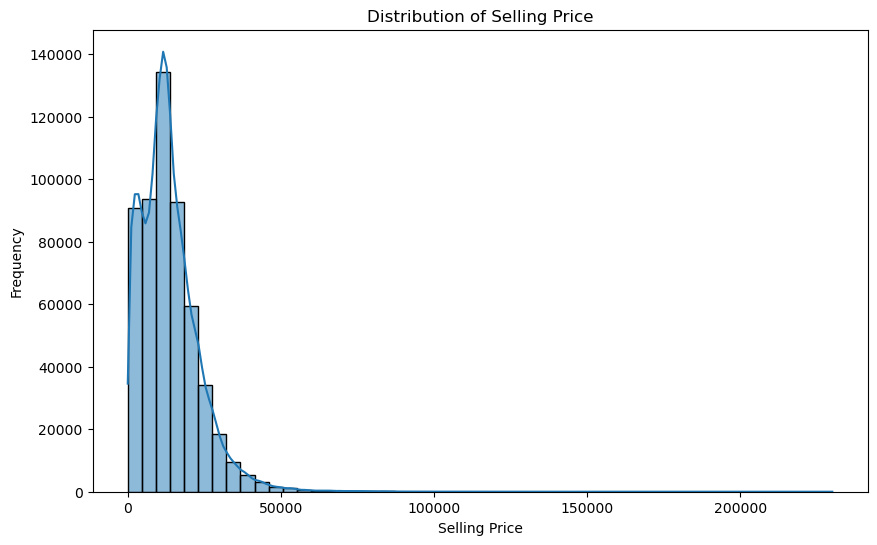

In [19]:
#Distribution of selling_price
plt.figure(figsize=(10,6))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

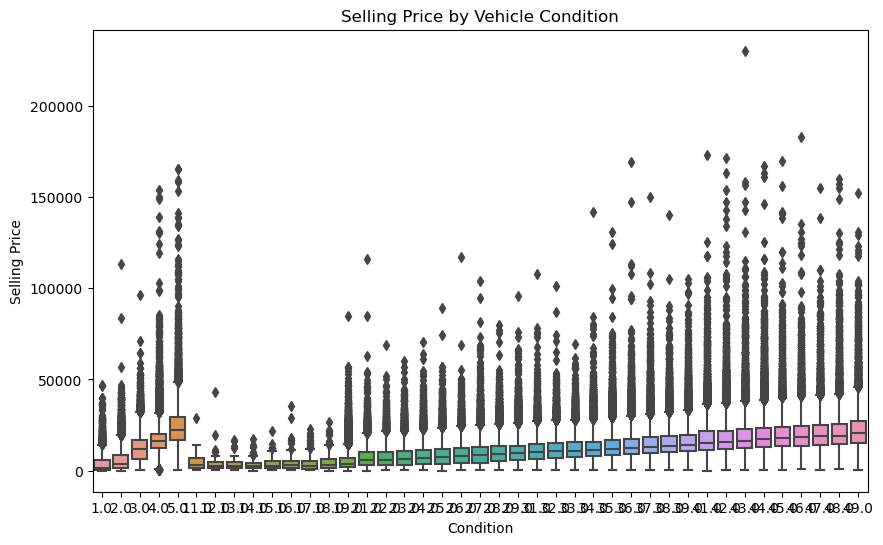

In [20]:
#Selling_rice vs condition
plt.figure(figsize=(10,6))
sns.boxplot(x='condition', y='sellingprice', data=df)
plt.title('Selling Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()

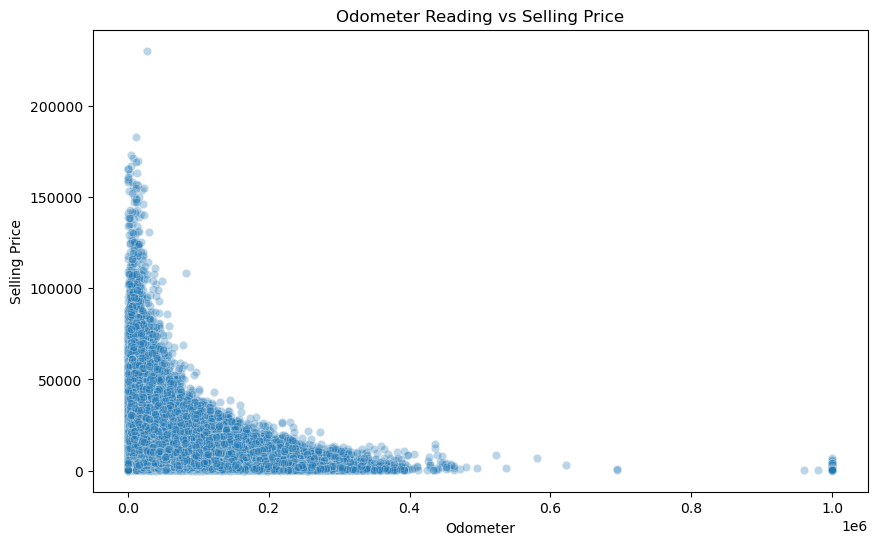

In [21]:
#Odometer vs Selling Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.3)
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

/tmp/ipykernel_1281/778104106.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


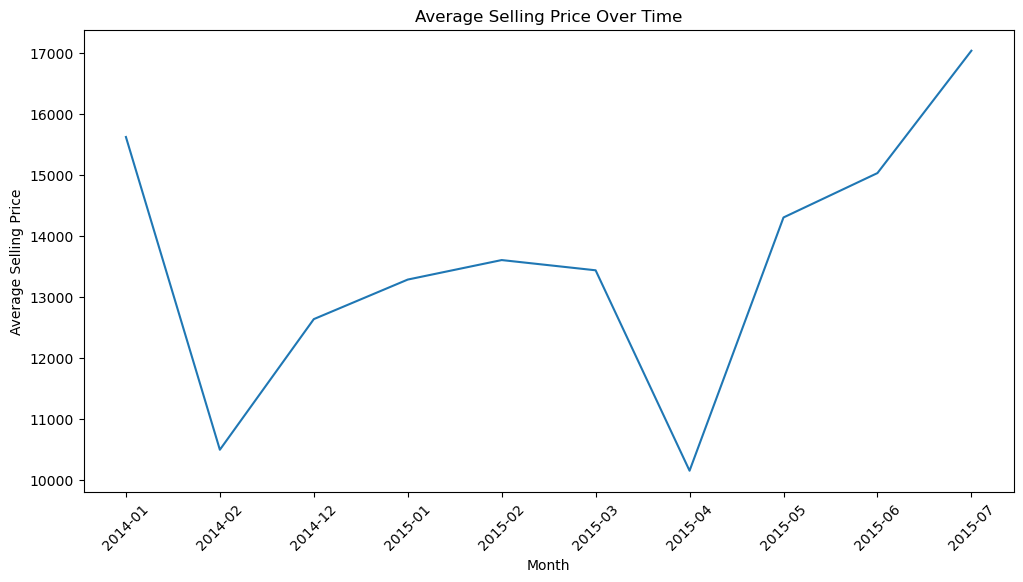

In [24]:
#Sales over Time
# First convert to datetime without timezone info
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
# Then convert UTC to naive datetime (removing timezone info)
df['saledate'] = df['saledate'].dt.tz_convert(None)
# Create period for grouping
df['sale_month'] = df['saledate'].dt.to_period('M')
# Group by month and calculate mean
monthly_sales = df.groupby('sale_month')['sellingprice'].mean().reset_index()

# Convert Period objects to strings for plotting
monthly_sales['sale_month_str'] = monthly_sales['sale_month'].astype(str)

plt.figure(figsize=(12,6))
# Use the string version of the dates for plotting
sns.lineplot(x='sale_month_str', y='sellingprice', data=monthly_sales)
plt.title('Average Selling Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

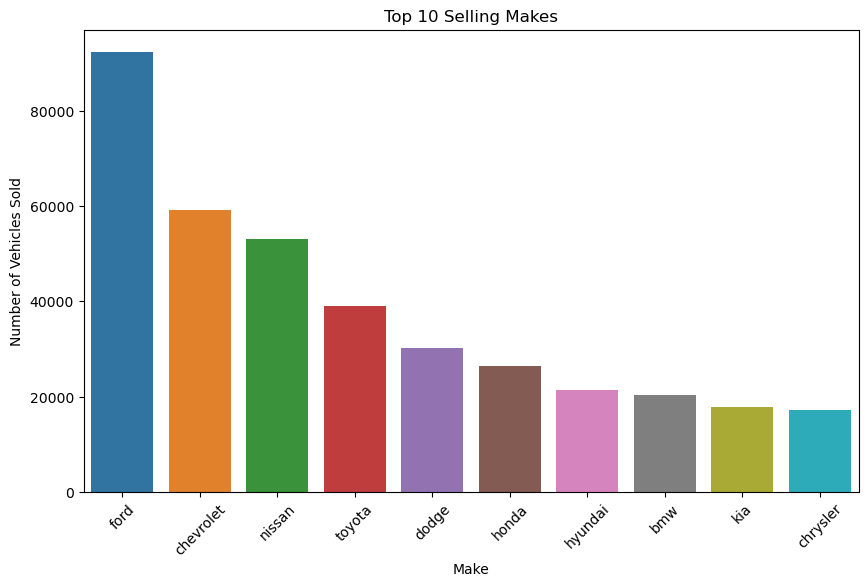

In [25]:
#Top selling makes
top_makes = df['make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 10 Selling Makes')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)
plt.show()


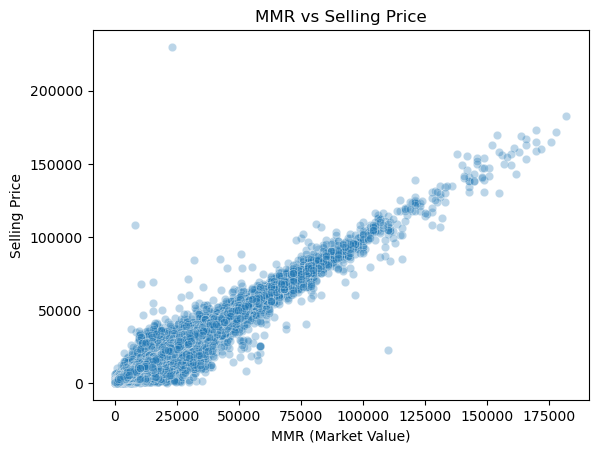

In [26]:
#MMR vs Selling Price
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.3)
plt.title('MMR vs Selling Price')
plt.xlabel('MMR (Market Value)')
plt.ylabel('Selling Price')
plt.show()

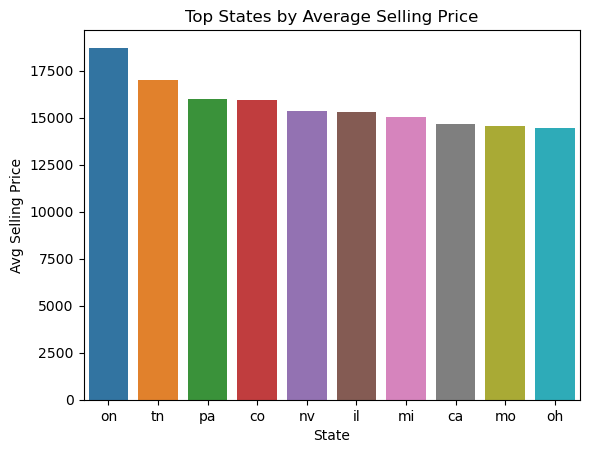

In [27]:
#Sales by State
state_sales = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Top States by Average Selling Price')
plt.xlabel('State')
plt.ylabel('Avg Selling Price')
plt.show()

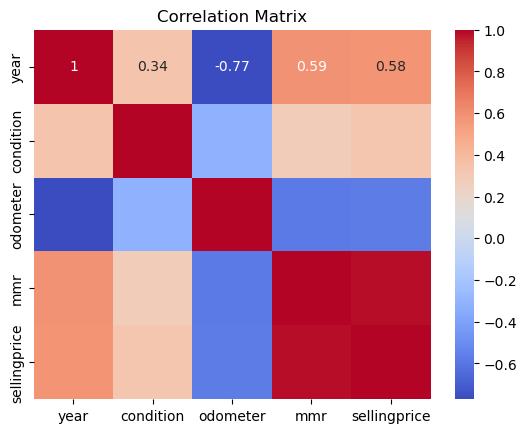

In [28]:
#Correlation Heatmap
numeric_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
#Using IQR(Interquartile Range) to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

# Example usage
outliers_price = detect_outliers_iqr(df, 'sellingprice')
outliers_odometer = detect_outliers_iqr(df, 'odometer')
outliers_mmr = detect_outliers_iqr(df, 'mmr')

sellingprice: 16297 outliers detected
odometer: 10738 outliers detected
mmr: 16430 outliers detected


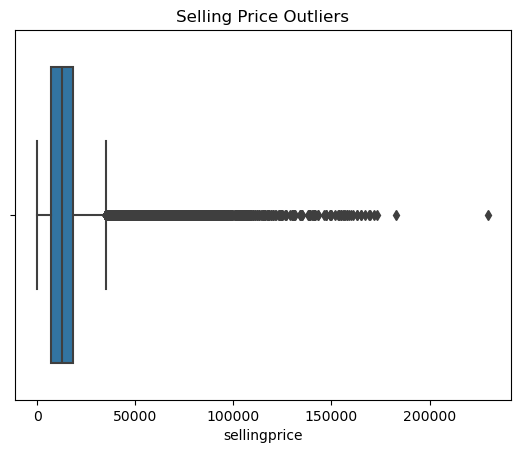

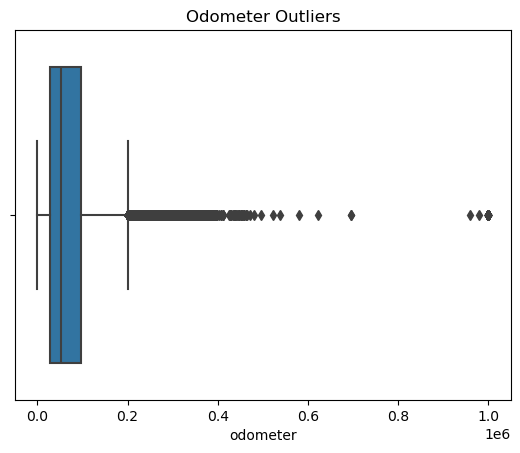

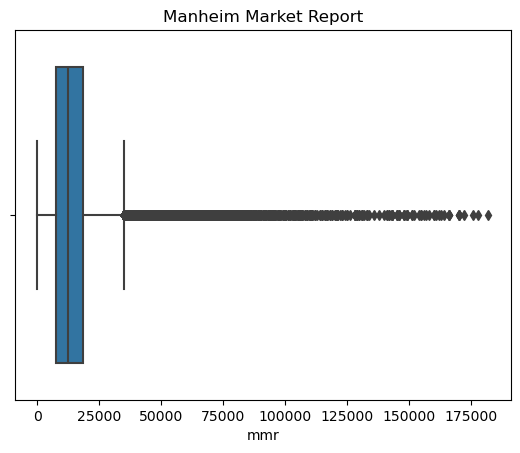

In [30]:
sns.boxplot(x=df['sellingprice'])
plt.title('Selling Price Outliers')
plt.show()

sns.boxplot(x=df['odometer'])
plt.title('Odometer Outliers')
plt.show()

sns.boxplot(x=df['mmr'])
plt.title('Manheim Market Report')
plt.show()

In [31]:
features = ['year', 'condition', 'odometer', 'mmr']
target = 'sellingprice'

In [32]:
df_original = df[features + [target]].dropna()

In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df_removed = df.copy()
for col in ['sellingprice', 'odometer', 'mmr']:
    df_removed = remove_outliers(df_removed, col)
df_removed = df_removed[features + [target]].dropna()

In [34]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

df_capped = df.copy()
for col in ['sellingprice', 'odometer', 'mmr']:
    df_capped = cap_outliers(df_capped, col)

df_capped['log_price'] = np.log1p(df_capped['sellingprice'])
df_capped['log_odometer'] = np.log1p(df_capped['odometer'])
df_capped['log_mmr'] = np.log1p(df_capped['mmr'])

features_log = ['year', 'condition', 'log_odometer', 'log_mmr']
target_log = 'log_price'
df_capped = df_capped[features_log + [target_log]].dropna()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Added to calculate RMSE manually

def evaluate_model(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate RMSE manually by taking the square root of MSE
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Manual calculation of RMSE
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

# Evaluate all three
rmse_orig, r2_orig = evaluate_model(df_original, features, target)
rmse_removed, r2_removed = evaluate_model(df_removed, features, target)
rmse_capped, r2_capped = evaluate_model(df_capped, features_log, target_log)

print("Original:     RMSE =", rmse_orig, "R² =", r2_orig)
print("Outliers Removed: RMSE =", rmse_removed, "R² =", r2_removed)
print("Capped + Log:     RMSE =", rmse_capped, "R² =", r2_capped)

Original:     RMSE = 1654.507337684032 R² = 0.9711799259807298
Outliers Removed: RMSE = 1517.62062948877 R² = 0.9589774689248037
Capped + Log:     RMSE = 0.23961950052731976 R² = 0.9285193292255294


In [36]:
df['vehicle_age'] = 2025 - df['year']

In [37]:
df['price_diff'] = df['sellingprice'] - df['mmr']
df['log_price_diff'] = np.log1p(np.abs(df['price_diff'])) * np.sign(df['price_diff'])

In [38]:
df['sale_month'] = df['saledate'].dt.month
df['sale_season'] = pd.cut(df['sale_month'],
                           bins=[0, 3, 6, 9, 12],
                           labels=['Winter', 'Spring', 'Summer', 'Fall'])

In [39]:
df['sale_dayofweek'] = df['saledate'].dt.dayofweek
df['is_weekend'] = df['sale_dayofweek'].isin([5, 6]).astype(int)

In [40]:
#Using one-hot encoder for linear models
df_encoded = pd.get_dummies(df, columns=['make', 'body', 'transmission', 'state'], drop_first=True)

In [41]:
encoded_cols = [col for col in df_encoded.columns if col.startswith(('make_', 'body_', 'transmission_', 'state_'))]

In [42]:
#Using interaction features
df['condition_x_age'] = df['condition'] * df['vehicle_age']
df['mmr_x_odometer'] = df['mmr'] / (df['odometer'] + 1)

In [43]:
features = [
    'log_odometer', 'log_mmr', 'vehicle_age', 'condition',
    'price_diff', 'log_price_diff', 'sale_month', 'is_weekend',
    'condition_x_age', 'mmr_x_odometer',
] + encoded_cols
target = 'log_price'

In [44]:
df['log_price'] = np.log1p(df['sellingprice'])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set
df_encoded['log_price'] = np.log1p(df_encoded['sellingprice'])
df_encoded['log_odometer'] = np.log1p(df_encoded['odometer'])
df_encoded['log_mmr'] = np.log1p(df_encoded['mmr'])
df_encoded['vehicle_age'] = 2025 - df_encoded['year']
df_encoded['price_diff'] = df_encoded['sellingprice'] - df_encoded['mmr']
df_encoded['log_price_diff'] = np.log1p(np.abs(df_encoded['price_diff'])) * np.sign(df_encoded['price_diff'])
df_encoded['condition_x_age'] = df_encoded['condition'] * df_encoded['vehicle_age']
df_encoded['mmr_x_odometer'] = df_encoded['mmr'] / (df_encoded['odometer'] + 1)
features = features
# Add encoded categorical features
encoded_cols = [col for col in df.columns if col.startswith(('make_', 'body_', 'transmission_', 'state_'))]
features += encoded_cols

# Define target
target = 'log_price'

# Drop rows with missing values in selected columns
df_model = df_encoded[features + [target]].dropna()

In [46]:
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
# Calculate RMSE manually by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("RMSE (log scale):", rmse)
print("R²:", r2)

Linear Regression Performance:
RMSE (log scale): 0.17850640123942213
R²: 0.9613141043752457


In [49]:
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)
rmse_actual = np.sqrt(y_test_actual, y_pred_actual)
print("RMSE (actual price):", rmse_actual)

RMSE (actual price): 58874      99.498744
51894     167.332005
349830    100.000000
21244      55.677644
513320     67.082039
             ...    
369121    108.166538
79396     117.473401
71317     128.452326
304176     93.273791
351973     97.467943
Name: log_price, Length: 109396, dtype: float64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


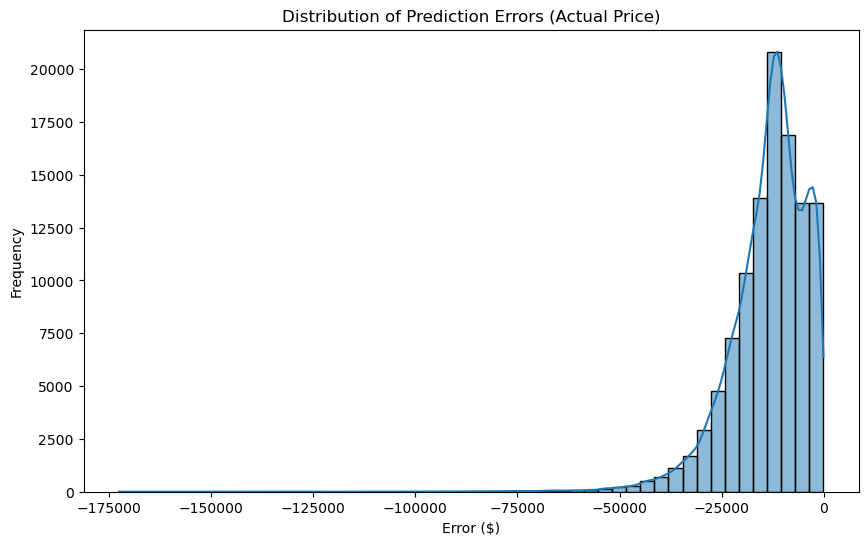

In [50]:
errors = y_pred_actual - y_test_actual

plt.figure(figsize=(10,6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors (Actual Price)')
plt.xlabel('Error ($)')
plt.ylabel('Frequency')
plt.show()

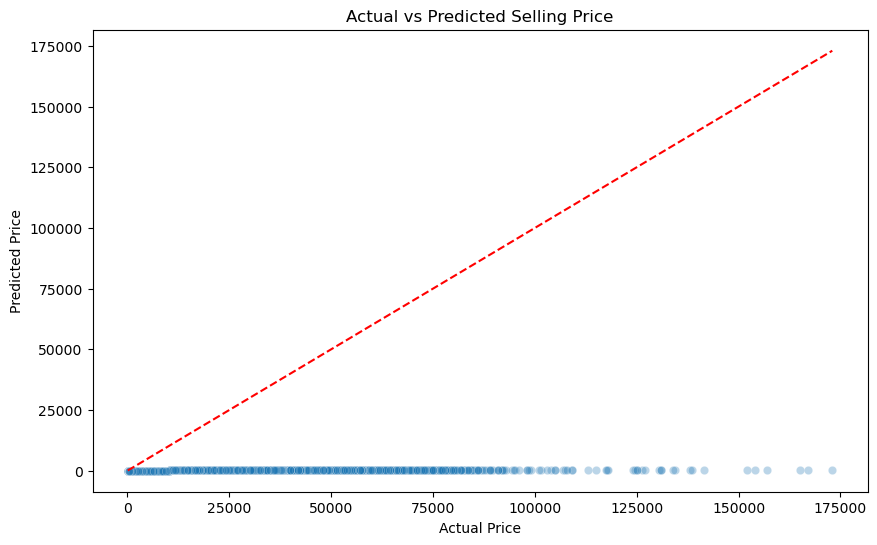

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', linestyle='--')
plt.title('Actual vs Predicted Selling Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()